<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Оценка-риска-ДТП" data-toc-modified-id="Оценка-риска-ДТП-1">Оценка риска ДТП</a></span><ul class="toc-item"><li><span><a href="#Подключитесь-к-базе.-Загрузите-таблицы-sql" data-toc-modified-id="Подключитесь-к-базе.-Загрузите-таблицы-sql-1.1">Подключитесь к базе. Загрузите таблицы sql</a></span></li><li><span><a href="#Проведите-первичное-исследование-таблиц" data-toc-modified-id="Проведите-первичное-исследование-таблиц-1.2">Проведите первичное исследование таблиц</a></span></li><li><span><a href="#Проведите-статистический-анализ-факторов-ДТП" data-toc-modified-id="Проведите-статистический-анализ-факторов-ДТП-1.3">Проведите статистический анализ факторов ДТП</a></span><ul class="toc-item"><li><span><a href="#Аналитические-задачи-для-коллег" data-toc-modified-id="Аналитические-задачи-для-коллег-1.3.1">Аналитические задачи для коллег</a></span></li><li><span><a href="#Возраст-автомобиля" data-toc-modified-id="Возраст-автомобиля-1.3.2">Возраст автомобиля</a></span></li></ul></li><li><span><a href="#Погода" data-toc-modified-id="Погода-1.4">Погода</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.5">Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Состояние-участника:-физическое-или-с-учётом-принятых-лекарств" data-toc-modified-id="Состояние-участника:-физическое-или-с-учётом-принятых-лекарств-1.5.1">Состояние участника: физическое или с учётом принятых лекарств</a></span></li><li><span><a href="#Направление-движения" data-toc-modified-id="Направление-движения-1.5.2">Направление движения</a></span></li><li><span><a href="#Тип-дороги" data-toc-modified-id="Тип-дороги-1.5.3">Тип дороги</a></span></li><li><span><a href="#Тип-КПП" data-toc-modified-id="Тип-КПП-1.5.4">Тип КПП</a></span></li><li><span><a href="#Наличие-телефона-в-автомобиле" data-toc-modified-id="Наличие-телефона-в-автомобиле-1.5.5">Наличие телефона в автомобиле</a></span></li><li><span><a href="#Тип-кузова" data-toc-modified-id="Тип-кузова-1.5.6">Тип кузова</a></span></li><li><span><a href="#Трезвость-участника" data-toc-modified-id="Трезвость-участника-1.5.7">Трезвость участника</a></span></li><li><span><a href="#Расстояние-от-главной-дороги" data-toc-modified-id="Расстояние-от-главной-дороги-1.5.8">Расстояние от главной дороги</a></span></li><li><span><a href="#Возраст-автомобиля" data-toc-modified-id="Возраст-автомобиля-1.5.9">Возраст автомобиля</a></span></li><li><span><a href="#Сумма-страховки" data-toc-modified-id="Сумма-страховки-1.5.10">Сумма страховки</a></span></li></ul></li><li><span><a href="#Создайте-модель-для-оценки-водительского-риска" data-toc-modified-id="Создайте-модель-для-оценки-водительского-риска-1.6">Создайте модель для оценки водительского риска</a></span><ul class="toc-item"><li><span><a href="#Финальное-тестирование" data-toc-modified-id="Финальное-тестирование-1.6.1">Финальное тестирование</a></span></li></ul></li><li><span><a href="#Проведите-анализ-важности-факторов-ДТП" data-toc-modified-id="Проведите-анализ-важности-факторов-ДТП-1.7">Проведите анализ важности факторов ДТП</a></span><ul class="toc-item"><li><span><a href="#Трезвость-участника" data-toc-modified-id="Трезвость-участника-1.7.1">Трезвость участника</a></span></li><li><span><a href="#Тип-кузова" data-toc-modified-id="Тип-кузова-1.7.2">Тип кузова</a></span></li><li><span><a href="#Сумма-страховки" data-toc-modified-id="Сумма-страховки-1.7.3">Сумма страховки</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-1.8">Выводы</a></span></li></ul></li></ul></div>

# Оценка риска ДТП

От каршеринговой компании поступил заказ: нужно создать систему, которая могла бы оценить риск ДТП по выбранному маршруту движения. Под риском понимается вероятность ДТП с любым повреждением транспортного средства. Как только водитель забронировал автомобиль, сел за руль и выбрал маршрут, система должна оценить уровень риска. Если уровень риска высок, водитель увидит предупреждение и рекомендации по маршруту.  
Идея создания такой системы находится в стадии предварительного обсуждения и проработки. Чёткого алгоритма работы и подобных решений на рынке ещё не существует. Текущая задача — понять, возможно ли предсказывать ДТП, опираясь на исторические данные одного из регионов.  
Идея решения задачи от заказчика:  
1. Создать модель предсказания ДТП (целевое значение — at_fault (виновник) в таблице parties)  
    o Для модели выбрать тип виновника — только машина (car).  
    o Выбрать случаи, когда ДТП привело к любым повреждениям транспортного средства, кроме типа SCRATCH (царапина).  
    o Для моделирования ограничиться данными за 2012 год — они самые свежие.  
    o Обязательное условие — учесть фактор aа автомобиля.  
2.	На основе модели исследовать основные факторы ДТП.  
3.	Понять, помогут ли результаты моделирования и анализ важности факторов ответить на вопросы:   
o	Возможно ли создать адекватную системы оценки водительского риска при выдаче авто?  
o	Какие ещё факторы нужно учесть?  
o	Нужно ли оборудовать автомобиль какими-либо датчиками или камерой?  

Заказчик предлагает поработать с базой данных по происшествиям и сформировать свои идеи создания такой системы.   

## Подключитесь к базе. Загрузите таблицы sql

In [1]:
# !pip install scikit-learn==1.1.1
# !pip install missingno
# !pip install matplotlib==3.8.0
# !pip install seaborn==0.13.0
# !pip install optuna
# !pip install phik
# !pip install shap
# !pip install category-encoders
# !pip install pandas==1.5.3

In [2]:
import warnings

import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import optuna
import pandas as pd
import phik
import seaborn as sns
import shap
from catboost import CatBoostClassifier
from category_encoders.target_encoder import TargetEncoder
from IPython.display import HTML, display
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (ConfusionMatrixDisplay, classification_report,
                             confusion_matrix, roc_auc_score, roc_curve)
from sklearn.model_selection import (StratifiedKFold, cross_val_score,
                                     cross_validate, train_test_split)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sqlalchemy import create_engine
from tqdm import tqdm

In [3]:
SEED = 12345

display(HTML('<style>.container { width:90% !important; }</style>'))
optuna.logging.set_verbosity(optuna.logging.WARNING)
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

In [4]:
db_config = {
'user': 'praktikum_student', # имя пользователя,
'pwd': '**************', # пароль,
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net', 
'port': 6432, # порт подключения,
'db': 'data-science-vehicle-db' # название базы данных
}

db_connection = 'postgresql://{}:{}@{}:{}/{}'.format(*db_config.values())
engine = create_engine(db_connection)

## Проведите первичное исследование таблиц

In [5]:
parties_query = '''
SELECT *
FROM parties
ORDER BY RANDOM()
LIMIT 10
'''
pd.read_sql_query(parties_query, con=engine, index_col='id')

,case_id,party_number,party_type,at_fault,insurance_premium,party_sobriety,party_drug_physical,cellphone_in_use
id,,,,,,,,
408707,4316015,1,car,1,NaN,impairment unknown,G,NaN
385067,4302266,1,car,1,18.0,had not been drinking,None,NaN
1245802,4818140,2,road bumper,0,NaN,None,None,0.0
390150,4305037,2,car,1,42.0,had not been drinking,None,0.0
2438847,5472132,1,car,0,60.0,had not been drinking,None,0.0
800805,4545097,2,car,0,74.0,had not been drinking,None,0.0
1232894,4811419,1,car,1,39.0,had not been drinking,None,0.0
2494292,5501985,1,car,1,20.0,had not been drinking,None,NaN
2015198,5241027,2,car,0,63.0,None,None,0.0


In [6]:
parties_dtypes_query = '''
SELECT column_name, data_type
FROM information_schema.columns
WHERE table_name = 'parties';
'''
pd.read_sql_query(parties_dtypes_query, con=engine, index_col='column_name')

,data_type
column_name,
cellphone_in_use,integer
party_number,integer
at_fault,integer
insurance_premium,integer
id,integer
case_id,text
party_drug_physical,text
party_type,text
party_sobriety,text


In [7]:
collisions_query = '''
SELECT *
FROM collisions
ORDER BY RANDOM()
LIMIT 10;
'''
pd.read_sql_query(collisions_query, con=engine, index_col='case_id')

,county_city_location,county_location,distance,direction,intersection,weather_1,location_type,collision_damage,party_count,primary_collision_factor,pcf_violation_category,type_of_collision,motor_vehicle_involved_with,road_surface,road_condition_1,lighting,control_device,collision_date,collision_time
case_id,,,,,,,,,,,,,,,,,,,
4350177,3612,san bernardino,126.0,north,0,clear,None,small damage,1,vehicle code violation,dui,hit object,fixed object,dry,normal,dark with street lights,functioning,2009-08-06,00:47:00
5356707,4300,santa clara,528.0,east,0,clear,highway,small damage,1,vehicle code violation,improper turning,hit object,fixed object,dry,normal,dark with no street lights,none,2011-09-16,02:15:00
5588306,4313,santa clara,0.0,None,1,clear,ramp,scratch,2,vehicle code violation,improper turning,head-on,other motor vehicle,dry,None,daylight,functioning,2012-04-03,11:50:00
5312697,3341,riverside,0.0,None,1,clear,None,middle damage,2,vehicle code violation,automobile right of way,broadside,other motor vehicle,dry,normal,daylight,none,2011-08-18,12:30:00
4529005,0600,colusa,5808.0,east,0,cloudy,None,small damage,1,vehicle code violation,improper turning,hit object,fixed object,dry,normal,dark with no street lights,none,2009-12-14,17:00:00
5176266,5002,stanislaus,303.0,east,0,clear,None,middle damage,2,unknown,unknown,other,other object,dry,normal,dark with street lights,none,2011-04-15,02:07:00
4569929,2708,monterey,0.0,None,1,clear,None,small damage,2,vehicle code violation,improper turning,sideswipe,other motor vehicle,dry,normal,dark with street lights,functioning,2009-09-04,21:59:00
4405855,2707,monterey,0.0,north,0,clear,intersection,small damage,2,vehicle code violation,speeding,rear end,other motor vehicle,dry,normal,daylight,none,2009-04-03,11:59:00
4969217,0103,alameda,125.0,west,0,clear,highway,small damage,2,vehicle code violation,speeding,rear end,other motor vehicle,dry,normal,daylight,none,2010-10-18,15:55:00


In [8]:
collisions_dtypes_query = '''
SELECT column_name, data_type
FROM information_schema.columns
WHERE table_name = 'collisions';
'''
pd.read_sql_query(collisions_dtypes_query,
                  con=engine, index_col='column_name')

,data_type
column_name,
party_count,integer
intersection,integer
distance,real
collision_date,date
collision_time,time without time zone
location_type,text
collision_damage,text
case_id,text
pcf_violation_category,text


In [9]:
vehicles_query = '''
SELECT *
FROM vehicles
ORDER BY RANDOM()
LIMIT 10;
'''
pd.read_sql_query(vehicles_query, con=engine, index_col='id')

,case_id,party_number,vehicle_type,vehicle_transmission,vehicle_age
id,,,,,
1351056,5479085,1,coupe,manual,6
1102478,5237967,2,minivan,manual,1
1391550,5519460,2,sedan,auto,6
899291,5038339,2,coupe,manual,6
849568,4979803,1,minivan,auto,9
509338,4625983,2,coupe,auto,7
362394,4458985,2,sedan,auto,3
1358741,5486572,1,coupe,manual,10
1047895,5186509,1,sedan,manual,3


In [10]:
vehicles_dtypes_query = '''
SELECT column_name,
       data_type
FROM information_schema.columns
WHERE table_name = 'vehicles';
'''
pd.read_sql_query(vehicles_dtypes_query, con=engine, index_col='column_name')

,data_type
column_name,
id,integer
party_number,integer
vehicle_age,integer
case_id,text
vehicle_type,text
vehicle_transmission,text


In [11]:
case_ids_query = '''
SELECT *
FROM case_ids
ORDER BY RANDOM()
LIMIT 10;
'''
pd.read_sql_query(case_ids_query, con=engine, index_col='case_id')

,db_year
case_id,
4221911,2021
5532445,2021
5585910,2021
5281578,2021
4962041,2021
4214252,2021
4758739,2021
5467589,2021
5422484,2021


In [12]:
case_ids_query = '''
SELECT db_year,
       COUNT(db_year)
FROM case_ids
GROUP BY db_year;
'''
pd.read_sql_query(case_ids_query, con=engine, index_col='db_year')

,count
db_year,
2021,1400000


**Вывод**:  
- количество таблиц соответствует условию задачи;  
- все таблицы имеют набор данных;  
- `case_id` - общий ключ для связи таблиц.

##  Проведите статистический анализ факторов ДТП

In [13]:
per_month = '''
SELECT DATE_TRUNC('month', collision_date)::date AS collisions_month,
       COUNT(case_id) AS cases_count
FROM collisions
GROUP BY DATE_TRUNC('month', collision_date);
'''
cases_per_year = pd.read_sql_query(per_month, con=engine,
                                   index_col='collisions_month')

In [14]:
def get_barplot(df, col, fig_size=(15, 15)):
    plt.figure(figsize=fig_size)
    pal = sns.color_palette('Blues', df.shape[0])
    ax = sns.barplot(y=df.index, x=df[col], hue=df[col], orient='h',
                     palette=pal, order=df.index, dodge=False)
    plt.ylabel('')
    plt.title(f'Количество ДТП')
    plt.yticks(fontsize=10)
    count = 0
    for item in ax.patches:
        if item.get_width():
            plt.text(item.get_width(), item.get_y(),
                     f'{item.get_width():.0f}', va='top',
                     fontsize=10)
    ax.get_legend().remove()

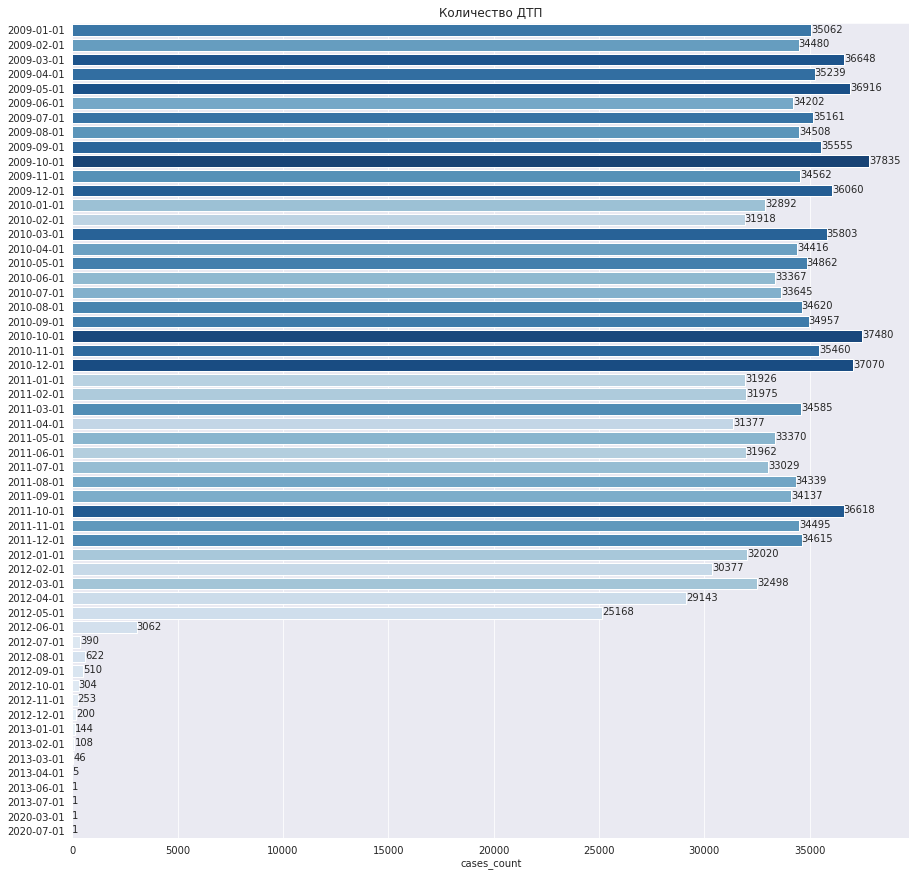

In [15]:
get_barplot(cases_per_year, 'cases_count')

Период после 2011-го года исключим, так как данных поступало недостаточно.

In [16]:
per_month = '''
SELECT EXTRACT(MONTH FROM collision_date)::int AS collisions_month,
       COUNT(case_id) AS cases_count
FROM collisions
WHERE EXTRACT(YEAR FROM collision_date) < 2012
GROUP BY EXTRACT(MONTH FROM collision_date)
ORDER BY cases_count DESC;
'''
cases_per_month = pd.read_sql_query(per_month, con=engine,
                                    index_col='collisions_month')

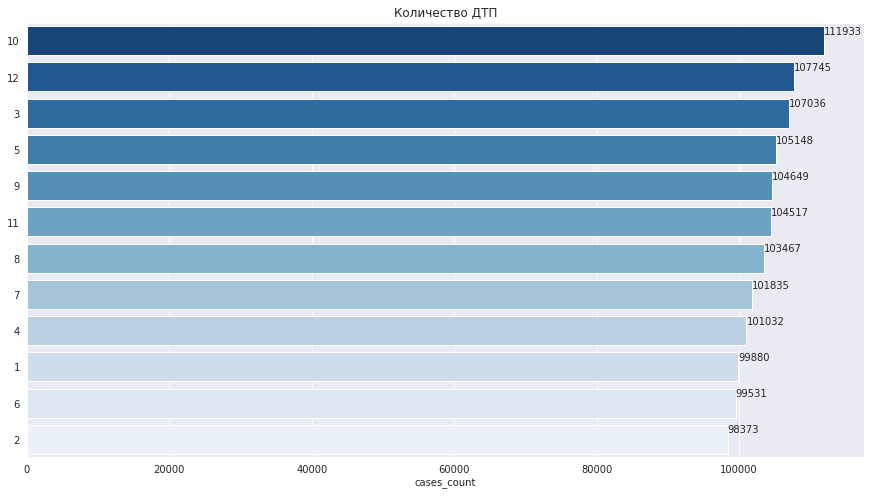

In [17]:
get_barplot(cases_per_month, 'cases_count', fig_size=(15, 8))

Наибольшее количество ДТП случается в весенний и осенний периоды, также одним из лидеров по количеству ДТП является декабрь. Найденные закономерности могут быть связаны, например, с увеличением количества клиентов в указанные периоды, либо с изменением погодных условий.

### Аналитические задачи для коллег

Задачи для коллег будут включать в себя анализ признаков с точки зрения целевой переменной, т.е. как на вероятность стать виновником ДТП повлияют следующие признаки:  
- географический район, где произошло ДТП;  
- погодные условия;  
- тип коробки передач;  
- тип кузова автомобиля;  
- возраст транспортного средства;  
- сумма страховки.

In [18]:
def get_barplot(df, col, y_axis='at_fault_cnt', fig_size=(15, 5),
                hue='at_fault', dodge=True, rot=None):
    plt.figure(figsize=fig_size)
    if col == 'age':
        df = df.query('-1 < age < 23')

    ax = sns.barplot(data=df, x=df.index, y=y_axis, palette='Blues',
                     hue=hue, dodge=dodge)
    plt.ylabel('Количество')
    if col != 'Возраст':
        patches = ax.patches[:df.shape[0]]
        patches = zip(patches[:df.shape[0] // 2], patches[df.shape[0] // 2:])
    
        patches = [p for item in patches for p in item]
        for p, percent in zip(patches, df['percentage'].values):
            ax.annotate(f'{percent: .0f}%',
                        (p.get_x(), p.get_height() * 1.005))
        if rot:
            plt.xticks(rotation=rot, ha='center')
        plt.legend(title='Является виновником ДТП',
                    loc='upper right')
        plt.title('Количество ДТП в зависимости от погоды')
    else:
        ax.get_legend().remove()
        ax = ax.twinx()
        local_data = df.query('at_fault == 1')['percentage']
        local_data.plot(style='o', c='cadetblue', alpha=.7, ax=ax)
        ax.set_ylabel('Доля виновников ДТП, %')
        plt.legend(['Доля виновников ДТП'], loc='upper right')
        plt.title('Количество ДТП в зависимости от возраста автомобиля')

    plt.grid(True)

In [19]:
def get_pivot_table(col, new_col, table='collisions'):
    unknown = 'unknown'
    order = 'cnt_total DESC'
    join = 'JOIN parties AS p ON p.case_id = t.case_id'
    if col == 'vehicle_age':
        unknown = -1
        order = col
        cond = 'WHERE '
        join = ('JOIN parties AS p ON p.case_id = t.case_id ' 
                 'AND p.party_number = t.party_number')
    query = f'''
    WITH count_by_col AS
        (SELECT DISTINCT(t.{col}),
                p.at_fault,
                COUNT(p.at_fault) OVER(PARTITION BY t.{col}, p.at_fault) 
                AS at_fault_cnt,
                COUNT(p.at_fault) OVER(PARTITION BY t.{col}) AS cnt_total
         FROM {table} AS t
         {join}
         ORDER BY {col})
    
    SELECT at_fault,
           at_fault_cnt,
           cnt_total,
           ROUND(at_fault_cnt * 100.0 / cnt_total, 2) AS percentage,
           CASE 
                WHEN {col} IS NULL THEN '{unknown}'
                ELSE {col}
           END AS {new_col}
    FROM count_by_col
    ORDER BY {order}, at_fault
    LIMIT 40;
    '''
    return pd.read_sql_query(query, con=engine, index_col=new_col)

### Возраст автомобиля

CPU times: user 578 ms, sys: 54 ms, total: 632 ms
Wall time: 6.64 s


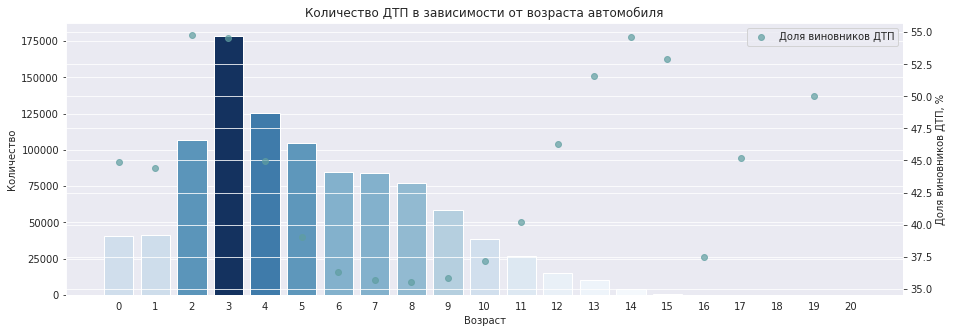

In [20]:
%%time
ages = get_pivot_table('vehicle_age', 'Возраст', table='vehicles')
get_barplot(ages, 'Возраст', y_axis='cnt_total', hue='cnt_total', dodge=False)

Возможно, автомобилей, чей возраст 3 года, больше остальных, поэтому они чаще попадают в ДТП.  
У водителей, управляющих автомобилями возрастом от трёх до восьми лет, риск оказаться виновником ДТП отрицательно коррелирует с возрастом транспортного средства,  
от восьми лет  - положительно.  
Значения, превышающие 15 лет, являются выбросами.

## Погода

CPU times: user 87.9 ms, sys: 12 ms, total: 99.8 ms
Wall time: 9.84 s


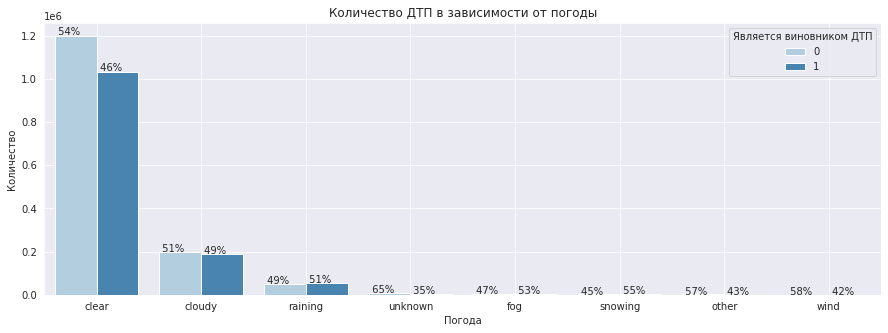

In [21]:
%%time
weather = get_pivot_table('weather_1', 'Погода')
get_barplot(weather, 'Погода')

При неблагоприятных погодных условиях у клиентов выше вероятность стать виновником ДТП.  
При этом больше всего аварий происходит в ясную погоду, которая преобладает в Калифорнии.

**Вывод**:  
- в осенний и весенний периоды, а также декабре происходит больше всего аварий;  
- если автомобилю от трёх до восьми лет, то вероятность оказаться виновником ДТП снижается по мере увеличения возраста транспортного средства,  
от восьми лет – возрастает;     
- неблагоприятные погодные условия негативно влияют на вероятность стать виновником аварии.

## Предобработка данных

In [22]:
query = '''
WITH parties_vehicles AS
    (SELECT v.vehicle_type,
            v.vehicle_transmission, 
            v.vehicle_age,
            p.*
    FROM parties AS p
    JOIN vehicles AS v ON p.case_id = v.case_id 
     AND p.party_number = v.party_number
    WHERE p.party_type = 'car')

SELECT c.county_city_location,
       c.distance,
       c.direction,
       c.intersection,
       c.weather_1,
       c.location_type,
       c.collision_damage,
       c.party_count,
       c.primary_collision_factor,
       c.pcf_violation_category,
       c.type_of_collision,
       c.motor_vehicle_involved_with,
       c.road_surface,
       c.road_condition_1,
       c.lighting, 
       c.control_device,
       EXTRACT(MONTH FROM c.collision_date)::int AS collision_month,
       EXTRACT(DOW FROM c.collision_date)::int AS collision_dow,
       EXTRACT(HOUR FROM c.collision_time)::int AS collision_hour,
       p_v.vehicle_type,
       p_v.vehicle_transmission, 
       p_v.vehicle_age,
       p_v.insurance_premium,
       p_v.party_sobriety, 
       p_v.party_drug_physical,
       p_v.cellphone_in_use,
       p_v.at_fault
FROM collisions AS c
JOIN parties_vehicles AS p_v ON c.case_id = p_v.case_id
WHERE EXTRACT(YEAR FROM c.collision_date) = 2012
  AND c.collision_damage != 'scratch';
'''
df = pd.read_sql_query(query, con=engine)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56248 entries, 0 to 56247
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   county_city_location         56248 non-null  object 
 1   distance                     56248 non-null  float64
 2   direction                    43230 non-null  object 
 3   intersection                 56073 non-null  float64
 4   weather_1                    56080 non-null  object 
 5   location_type                25932 non-null  object 
 6   collision_damage             56248 non-null  object 
 7   party_count                  56248 non-null  int64  
 8   primary_collision_factor     56137 non-null  object 
 9   pcf_violation_category       55482 non-null  object 
 10  type_of_collision            55940 non-null  object 
 11  motor_vehicle_involved_with  56086 non-null  object 
 12  road_surface                 55900 non-null  object 
 13  road_condition_1

In [24]:
size_before = df.shape[0]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56248 entries, 0 to 56247
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   county_city_location         56248 non-null  object 
 1   distance                     56248 non-null  float64
 2   direction                    43230 non-null  object 
 3   intersection                 56073 non-null  float64
 4   weather_1                    56080 non-null  object 
 5   location_type                25932 non-null  object 
 6   collision_damage             56248 non-null  object 
 7   party_count                  56248 non-null  int64  
 8   primary_collision_factor     56137 non-null  object 
 9   pcf_violation_category       55482 non-null  object 
 10  type_of_collision            55940 non-null  object 
 11  motor_vehicle_involved_with  56086 non-null  object 
 12  road_surface                 55900 non-null  object 
 13  road_condition_1

In [25]:
def get_missing_values_percentage(df):
    percent_missing = df.isna().mean() * 100
    percent_missing.sort_values(inplace=True, ascending=False)
    return percent_missing.drop(percent_missing[percent_missing == 0].index)


def get_missing_values_barplot(df):
    temp = get_missing_values_percentage(df)
    plt.figure(figsize=(10, 5))
    pal = sns.color_palette('Blues', len(temp))
    ax = sns.barplot(y=temp.index, x=temp.values, hue=temp.index,
                     palette=pal[::-1], dodge=False)
    plt.ylabel('')
    plt.title(f'Процент пропущенных значений по стобцам')
    plt.yticks(fontsize=12)
    for item in ax.patches:
        if not np.isnan(item.get_width()):
            plt.text(item.get_width(), item.get_y(),
                     f'{item.get_width():.1f}%', va='top',
                     fontsize=12)

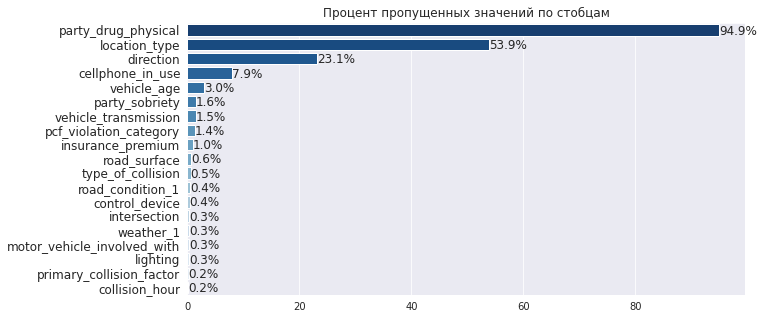

In [26]:
get_missing_values_barplot(df)

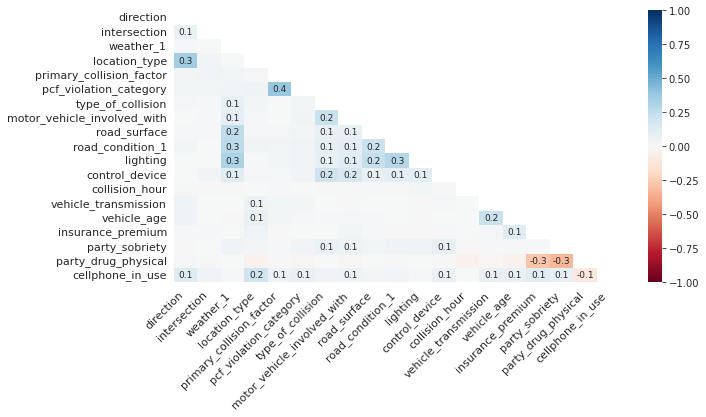

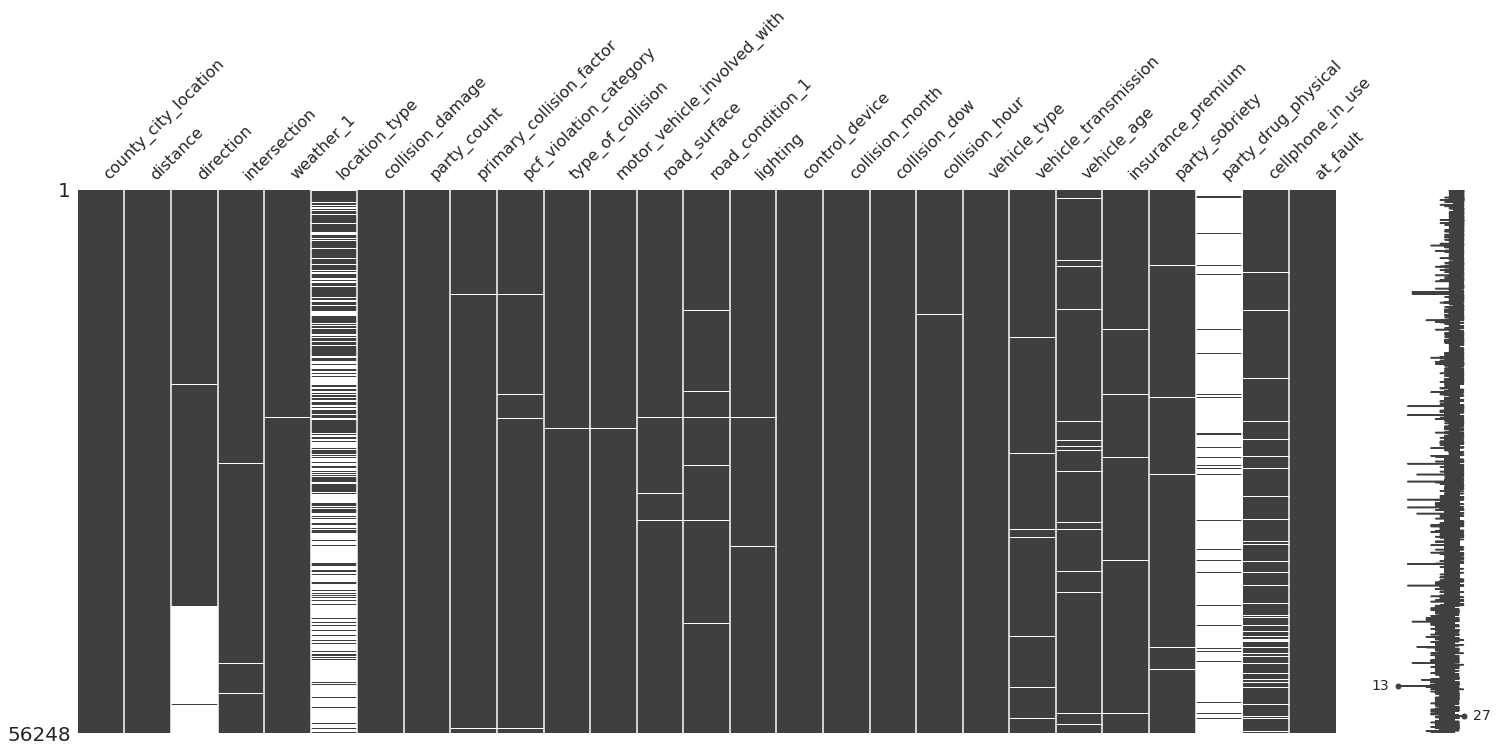

In [27]:
msno.heatmap(df, fontsize=11, figsize=(10, 5))
msno.matrix(df.sort_values(by='distance', ascending=False));

При высоких значениях переменной `distance` появляются пропуски в столбце с информацией о направлении движения, а также возрастает количество   
пропущенных значений в колонке `location_type`.

In [28]:
%%time
phik_overview = df.phik_matrix(interval_cols=['distance', 'insurance_premium'])

CPU times: user 11.1 s, sys: 39.1 ms, total: 11.1 s
Wall time: 11.2 s


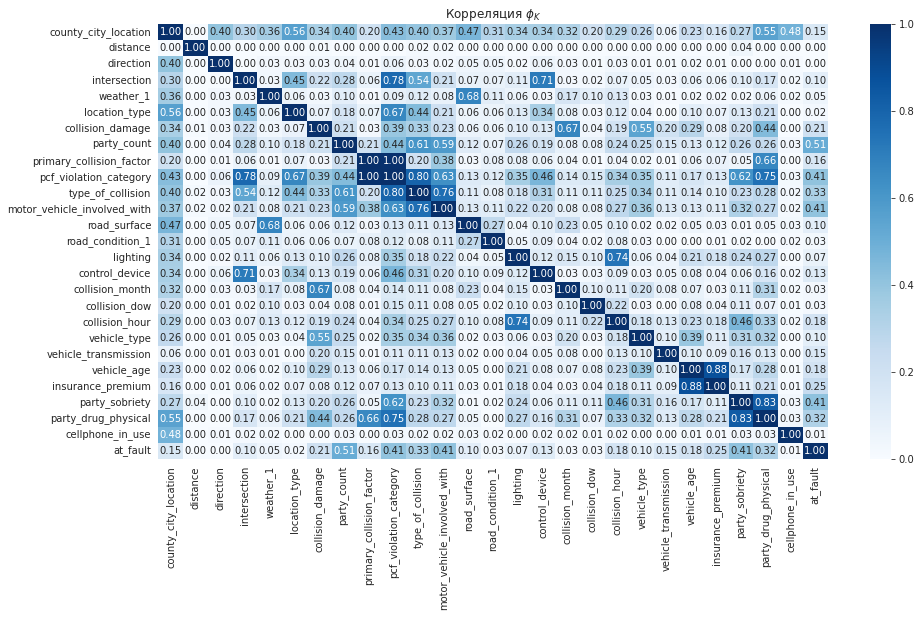

In [29]:
plt.figure(figsize=(15, 8))
sns.heatmap(data=phik_overview, fmt='.2f', cmap='Blues', annot=True)
plt.title('Корреляция $\phi_K$')
plt.show()

Для категории нарушения и основного фактора аварии коэффициент Фи равен 1, также сильная корреляция между суммой страховки и возрастом автомобиля.  
Наиболее заметная взаимосвязь с целевой переменной наблюдается у следующих признаков:  
- `party_count` - 0.51;  
- `party_sobriety` - 0.41;  
- `pcf_violation_category` - 0.41;  
- `motor_vehicle_involved_with` - 0.41.

In [30]:
title_dict = {
    'vehicle_age': ['Возраст автомобиля (в годах)',
                    'возраста автомобиля'],
    'insurance_premium': ['Сумма страховки', 'суммы страховки'],
    'distance_cat': ['Расстояние от главной дороги (в метрах)',
                 'расстояния от главной дороги'],
    'weather_1': ['Погода', 'погоды'],
    'direction': ['Направление движения', 'направления движения'],
    'location_type': ['Тип дороги', 'типа дороги'],
    'vehicle_transmission': ['Тип КПП', 'типа КПП'],
    'cellphone_in_use': ['Наличие телефона в автомобиле',
                         'наличия телефона в автомобиле '],
    'party_sobriety': ['Уровень трезвости', 'уровня трезвости'],
    'pcf_violation_category': ['Категория нарушения', 'категории нарушения'],
    'party_drug_physical': ['Состояние участника', 'состояния участника'],
    'party_count': ['Количество участников', 'количества участников'],
    'vehicle_type': ['Тип кузова', 'типа кузова']
}


def get_temp(df, col, target='at_fault', num=None):
    temp = df.pivot_table(index=col, values=target, aggfunc=('count', 'mean'))
    temp = temp.sort_values(by='count', ascending=False)
    temp[target] = temp['count'] * temp['mean']
    temp['not_at_fault'] = temp['count'] - temp[target]
    temp = temp.sort_values(by='count', ascending=False)[:num]
    percentage = temp['mean'] * 100
    columns_dict = {
        target: 'Является виновником ДТП',
        'not_at_fault': 'Не является виновником ДТП'
    }
    temp = temp.rename(columns=columns_dict)
    temp = temp.drop(['count', 'mean'], axis=1).melt(ignore_index=False)
    

    percentage_second = [100 - x for x in percentage]
    percentage = list(percentage.values) + percentage_second
    return percentage, temp


def draw_barplot(temp, prcnt, col, title, fig_size=(15, 5), rot=None):
    plt.figure(figsize=fig_size)
    length = temp.shape[0] // 2
    ax = sns.barplot(data=temp, x=temp.index, y='value', palette='Blues',
                     order=temp.index[:length], hue='variable')
    for p, percent in zip(ax.patches, prcnt):
        ax.annotate(f'{percent: .2f}%', (p.get_x(), p.get_height() * 1.005))
    if rot:
        plt.xticks(rotation=rot, ha='center')
        
    plt.ylabel('Количество')
    plt.xlabel(title_dict[col][0])
    plt.title(f'Доля виновников ДТП в зависимости от {title_dict[col][1]}')
    plt.legend(title='')
    plt.grid(True)
    plt.show()


def get_barplot(df, col, title=None, num=None, fig_size=(15, 5), rot=None):
    percentage, temp = get_temp(df=df, col=col, num=num)
    draw_barplot(temp, percentage, col, title, fig_size, rot)

In [31]:
def get_histogram(data, col, f_size=(15, 5), bins_num=20, plot_style='-'):
    fig, axs = plt.subplots(2, 1, figsize=(f_size), sharex=True,
                            gridspec_kw={'height_ratios': [3, 1]})
    median = data[col].median()
    mean = data[col].mean()
    ax = axs[0]
    sns.histplot(data[col], bins=bins_num, ax=ax, edgecolor='white',
                 label='Общее количество ДТП', kde=True)
    sns.histplot(
        data.query('at_fault == 1')[col], bins=bins_num,
        edgecolor='white', color='sandybrown', label='Виновники ДТП',
        ax=ax, alpha=.5, kde=True,
    )
    
    ax.axvline(x=median, c='r',
               label=f'Медиана: {median:.0f}')
    ax.axvline(x=mean, c='r', ls='--',
               label=f'Среднее: {mean:.0f}')

    ax.legend(loc='upper left')
    ax.set_ylabel('Количество')
    ax.grid(True)

    idx = col
    fractions = data.pivot_table(index=idx, values='at_fault')
    fractions.columns = ['Доля виновников ДТП']
    ax = ax.twinx()
    fractions.plot(style=plot_style, c='cadetblue', alpha=.7, ax=ax)
    ax.set_ylabel('Доля виновников ДТП', labelpad=5, ha='center')
    ax.legend(loc='upper right')
    ax.grid(False)

    red_circle = dict(markerfacecolor='red', marker='o',
                      markeredgecolor='white')
    ax = axs[1]
    data[col].plot.box(flierprops=red_circle, ax=ax, vert=False)
    ax.set_yticks([])
    ax.set_xlabel(title_dict[col][0])
    plt.title(f'Распределение {title_dict[col][1]}')
    plt.tight_layout()

Информацию в переменных `party_count`, `pcf_violation_category`, `motor_vehicle_involved_with`, `type_of_collision`,
`primary_collision_factor` и `collision_damage` мы получаем после ДТП, поэтому не можем её использовать в модели.

In [32]:
to_drop = ['party_count', 'pcf_violation_category',
           'motor_vehicle_involved_with', 'type_of_collision',
            'primary_collision_factor', 'collision_damage']
df = df.drop(to_drop, axis=1)

### Состояние участника: физическое или с учётом принятых лекарств

,G,under drug influence,sleepy/fatigued,not applicable,impairment - physical
party_drug_physical,1238,857,390,250,122


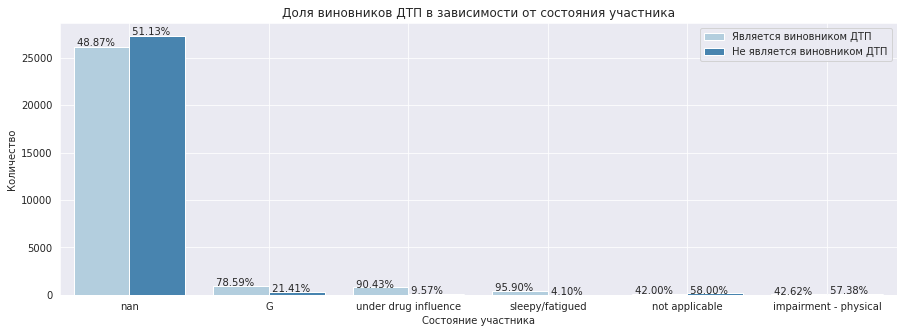

In [33]:
display(df['party_drug_physical'].value_counts().to_frame().T)
get_barplot(df.fillna(value='nan'), 'party_drug_physical')

Вероятно, в большинстве случаев состояние клиента не оценивалось, поэтому появились пропуски.  
Заполним пропуски значением `not applicable`.

In [34]:
df['party_drug_physical'] = df['party_drug_physical'].fillna('not applicable')

### Направление движения

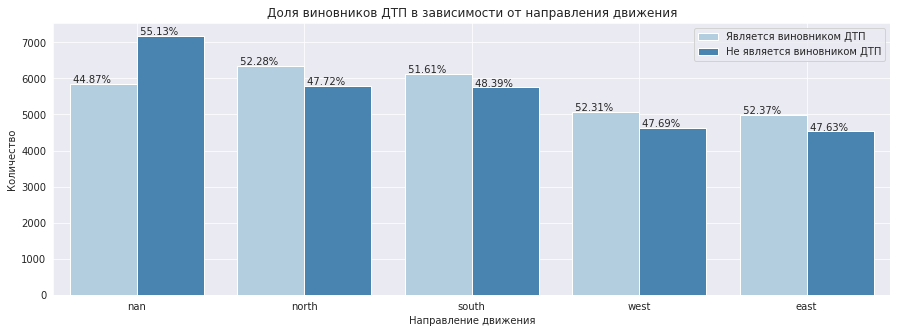

In [35]:
get_barplot(df.fillna(value='nan'), 'direction')

Статистически значимые различия в доле виновников ДТП между классами отсутствуют.   
Пропуски заполним значением `unknown`.

In [36]:
df['direction'] = df['direction'].fillna(value='unknown')

### Тип дороги

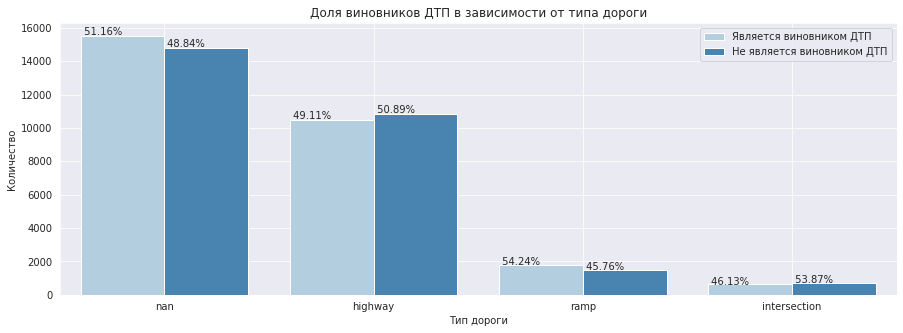

In [37]:
get_barplot(df.fillna(value='nan'), 'location_type')

Рампа лидирует по доле виновников ДТП.  
Пропуски заполним значением `unknown`.

In [38]:
df['location_type'] = df['location_type'].fillna('unknown')

### Тип КПП

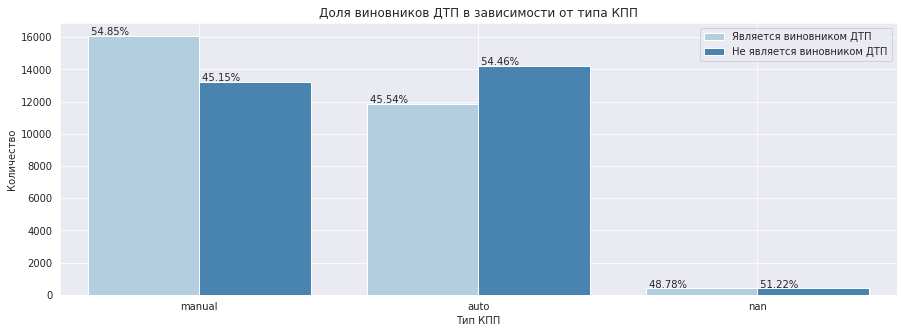

In [39]:
get_barplot(df.fillna('nan'), 'vehicle_transmission')

У клиентов, управляющих автомобилем с ручной КПП, выше вероятность стать виновником аварии.   
Ручная коробка передач – редкое явление для США, поэтому человек, вносивший информацию, мог не посчитать нужным указывать тип трансмиссии.  
Заполним пропуски значением `auto`.

In [40]:
df['vehicle_transmission'] = df['vehicle_transmission'].fillna('auto')

### Наличие телефона в автомобиле

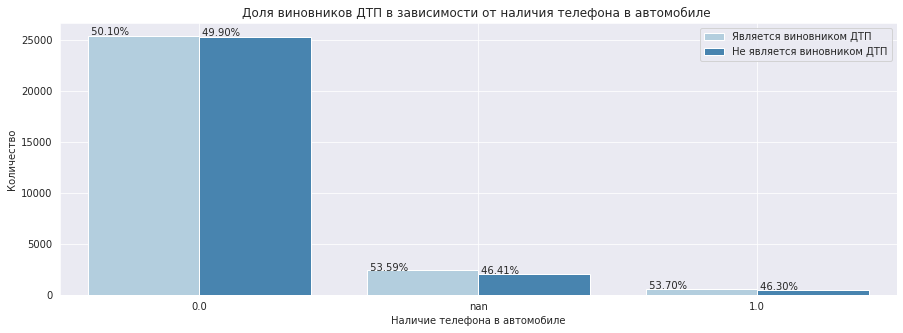

In [41]:
get_barplot(df.fillna('nan'), 'cellphone_in_use')

Наличие телефона в автомобиле негативно влияет на риск оказаться виновником ДТП.

In [42]:
df['cellphone_in_use'] = df['cellphone_in_use'].fillna(1)

### Тип кузова

,sedan,coupe,other
vehicle_type,37180,19064,4


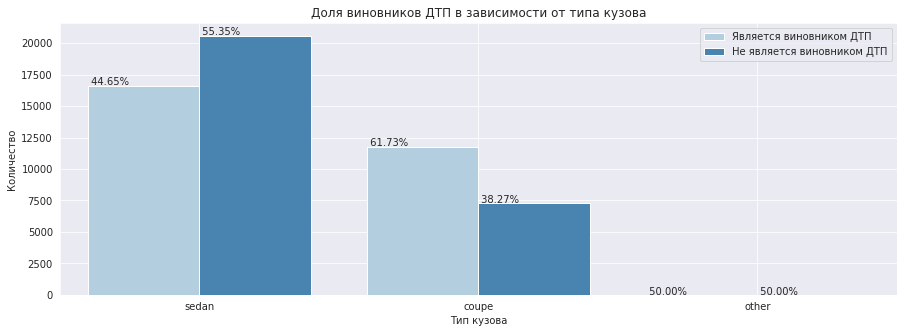

In [43]:
display(df['vehicle_type'].value_counts().to_frame().T)
get_barplot(df, 'vehicle_type')

Удалим выбросы.  

In [44]:
df = df.drop(df.query('vehicle_type == "other"').index, axis=0)

### Трезвость участника

,had not been drinking,"had been drinking, under influence",impairment unknown,"had been drinking, not under influence","had been drinking, impairment unknown",not applicable
party_sobriety,48574,4475,1238,575,261,250


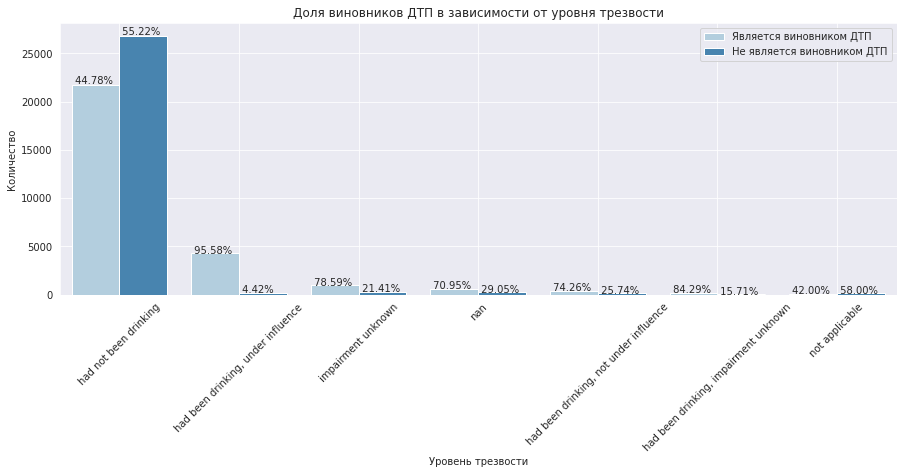

In [45]:
display(df['party_sobriety'].value_counts().to_frame().T)
get_barplot(df.fillna(value='nan'), 'party_sobriety', rot=45)

Данные выглядят логично: участник ДТП, находящийся под влиянием алкоголя, имеет наибольшие шансы оказаться виновником аварии.  
Пропуски заполним значением `unknown`.

In [46]:
df['party_sobriety'] = df['party_sobriety'].fillna('unknown')

### Расстояние от главной дороги

In [47]:
df['distance_cat'] = pd.cut(
    df['distance'], bins=5000, labels=list(range(5000))
)
df['distance_cat'] = \
    df.groupby('distance_cat', observed=False)['distance'].transform('mean')

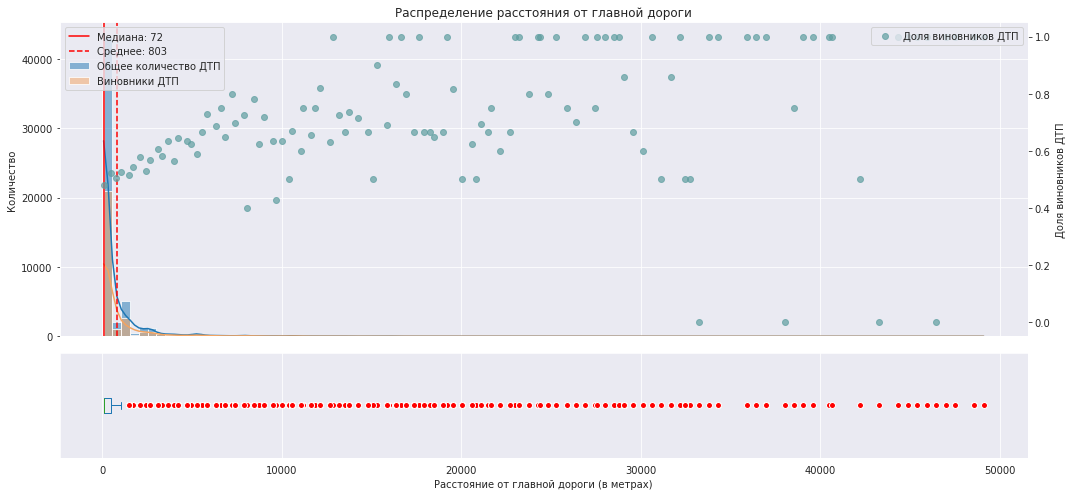

In [48]:
get_histogram(df.query('distance_cat < 50000'), 'distance_cat', bins_num=100,
              f_size=(15, 7), plot_style='o')

Значения, превышающие 13 тыс. метров, можно считать выбросами.

In [49]:
df = df.drop(df.query('distance_cat > 13000').index, axis=0)
df = df.drop('distance_cat', axis=1)

### Возраст автомобиля

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,161.0
vehicle_age,3080,2536,6017,10918,7084,5514,3906,3800,3470,2743,1915,1366,870,548,281,37,6,3,1,2


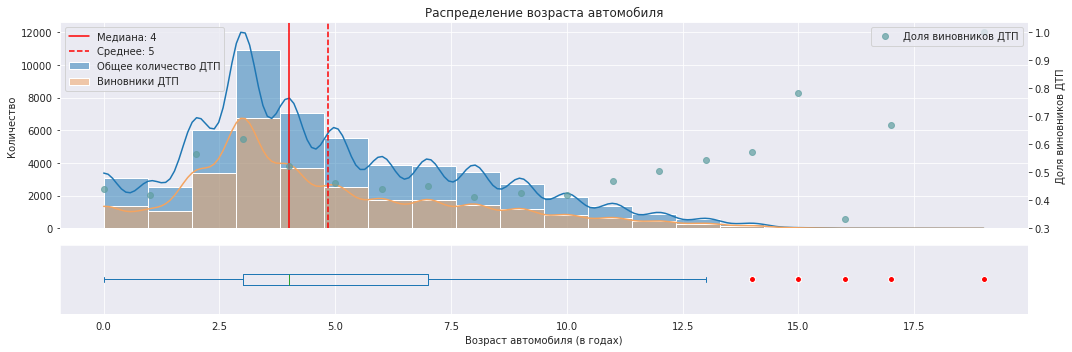

In [50]:
display(df['vehicle_age'].value_counts().sort_index().to_frame().T)
get_histogram(df.query('vehicle_age < 20'), 'vehicle_age', plot_style='o')

Автомобили возрастом 161 год являются аномалиями.  
Вероятность оказаться виновником ДТП снижается при возрасте машины выше трёх лет и начинает увеличиваться при возрасте автомобиля, превышающем восем лет.  
Значения, превышающие 14 лет, являются выбросами.

In [51]:
df = df.drop(df.query('vehicle_age > 14').index, axis=0)

Отсутствующие значения заполним, сгруппировав данные по географическому району, типу кузова и типу КПП.

In [52]:
group_cols = ['county_city_location', 'vehicle_type', 'vehicle_transmission']
df['vehicle_age'] = (
    df.groupby(group_cols)['vehicle_age']
    .transform(lambda x: x.fillna(x.mode(dropna=True).get(0, float('nan'))))
)

### Сумма страховки

,19.0,21.0,20.0,22.0,18.0,23.0,24.0,25.0,26.0,27.0,...,93.0,96.0,99.0,97.0,98.0,100.0,102.0,105.0,101.0,2.0
insurance_premium,2138,2107,2069,1915,1815,1766,1678,1568,1503,1389,...,2,2,2,2,2,1,1,1,1,1


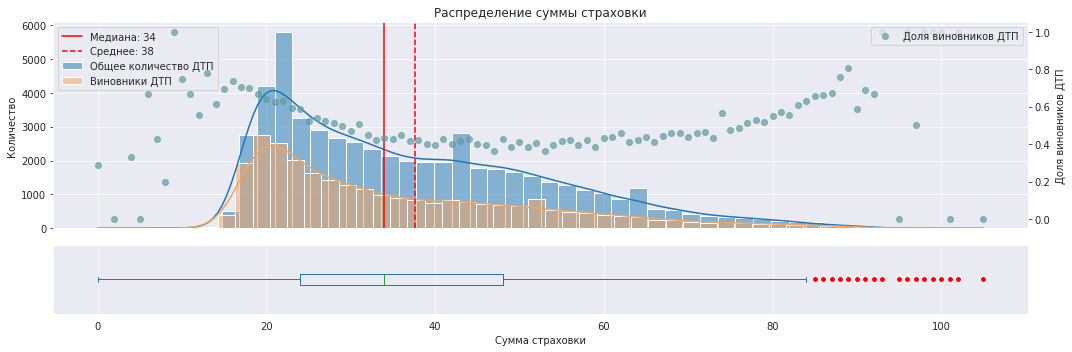

In [53]:
display(df['insurance_premium'].value_counts().to_frame().T)
get_histogram(df, 'insurance_premium', bins_num=50, plot_style='o')

Выбросами можно считать значения ниже 15 и выше 89.

In [54]:
outliers = df.query('insurance_premium < 15 or insurance_premium > 89').index
df = df.drop(outliers, axis=0)

Для заполнения пропусков сгруппируем данные по номеру географического района, типу кузова, типу коробки передач и возрасту автомобиля.

In [55]:
group_cols = ['county_city_location', 'vehicle_type',
              'vehicle_transmission', 'vehicle_age']
df['insurance_premium'] = (
    df.groupby(group_cols)['insurance_premium']
    .transform(lambda x: x.fillna(x.mode(dropna=True).get(0, float('nan'))))
)

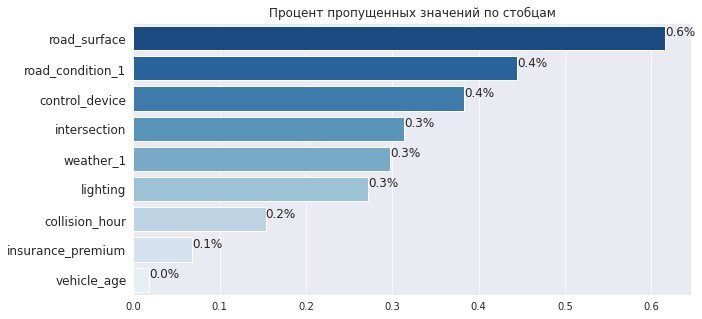

In [56]:
get_missing_values_barplot(df)

In [57]:
df = df.dropna()
print(f'Явные дубликаты: {df.duplicated().sum()}')
df = df.drop_duplicates()
percentage = df.shape[0] / size_before * 100
print(f'Доля от изначального объёма данных: {percentage:.0f}%')

Явные дубликаты: 28
Доля от изначального объёма данных: 97%


**Вывод**:    
- обработка пропусков:  
    - `direction`, `location_type`, `party_sobriety`, `pcf_violation_category`, - заполнены значением `unknown`;  
    - `vehicle_transmission` - значением `auto`;   
    - `party_drug_physical` - значением `not applicable`;  
    - `cellphone_in_use` - значением `1`;  
    - `vehicle_age` - модой в зависимости от географического района, типа кузова и типа КПП;  
    - `insurance_premium` - модой в зависимости от географического района, типа кузова, типа КПП и возраста автомобиля;  
    - пропуски в остальных столбцах были удалены;  
-	в переменных `distance`, ` vehicle_age ` и ` insurance_premium ` удалены выбросы и аномалии;
- после предобработки сохранилось примерно 97% данных;  
-	информация в столбцах `party_count`,
`pcf_violation_category`, ` motor_vehicle_involved_with `, ` type_of_collision `, 
` primary_collision_factor`, ` collision_damage ` стала известна только после ДТП – применять её для предсказания виновника аварии мы не можем.

## Создайте модель для оценки водительского риска

In [58]:
numeric_columns = df.select_dtypes(include=np.number).columns
df[numeric_columns] = \
    df[numeric_columns].apply(pd.to_numeric, downcast='integer')
float_columns = df.select_dtypes(include=['float']).columns
df[float_columns] = \
    df[float_columns].apply(pd.to_numeric, downcast='float')

In [59]:
df = df.reset_index(drop=True)
features = df.drop('at_fault', axis=1)
target = df['at_fault']
features_train, features_test, target_train, target_test = train_test_split(
    features, target, stratify=target,
    test_size=.2, random_state=SEED
)

In [60]:
obj_selector = make_column_selector(dtype_include='object')

In [61]:
te_columns = [features_train.columns.get_loc(col)
              for col in obj_selector(features_train)]

In [62]:
features_train['county_city_location'] = \
    features_train['county_city_location'].astype('int16')
features_test['county_city_location'] = \
    features_test['county_city_location'].astype('int16')

In [63]:
def objective(trial,
              X_train=features_train, y_train=target_train,
              te_cols=te_columns, classifier='cat',
              depth=(10, 23), split=(26, 33), features=(2, 26)):
    if classifier == 'cat':
        cat_params = {
            'colsample_bylevel': trial.suggest_float(
                'colsample_bylevel', 0.01, 1
            ),
            'depth': trial.suggest_int('depth', 2, 7),
            'boosting_type': trial.suggest_categorical(
                'boosting_type', ['Ordered', 'Plain']
            ),
            'bootstrap_type': trial.suggest_categorical(
                'bootstrap_type', ['Bayesian', 'Bernoulli', 'MVS']
            ),
            'used_ram_limit': '3gb',
            'auto_class_weights': 'Balanced',
            'silent': True,
            'random_state': SEED,
            'thread_count': -1,
            'cat_features': te_cols
        }

        if cat_params['bootstrap_type'] == 'Bayesian':
            cat_params['bagging_temperature'] = trial.suggest_float(
                'bagging_temperature', 0, 10
            )
        elif cat_params['bootstrap_type'] == 'Bernoulli':
            cat_params['subsample'] = trial.suggest_float('subsample', 0.1, 1)

        clf = CatBoostClassifier(**cat_params)
        
        result = cross_val_score(
            clf, X_train, y_train, scoring='roc_auc', n_jobs=-1,
            cv=StratifiedKFold(5, random_state=SEED, shuffle=True),
            error_score='raise'
        )
        return result.mean()

    if classifier == 'rf':
        rf_params = {
            'n_estimators': trial.suggest_int('n_estimators', 20, 100),
            'max_depth': trial.suggest_int('max_depth', *depth),
            'max_features': trial.suggest_int('max_features', *features),
            'min_samples_split': trial.suggest_int('min_samples_split',
                                                   *split)
        }
        clf = RandomForestClassifier(n_jobs=-1, random_state=SEED,
                                     class_weight='balanced', **rf_params)

    else:
        lr_params = {
            'C': trial.suggest_float('C', 1e-3, 1),
            'max_iter': trial.suggest_int('max_iter', 100, 1000),
            'solver': trial.suggest_categorical(
                'solver', ['lbfgs', 'liblinear', 'sag', 'saga']
            ),
            'intercept_scaling': trial.suggest_int(
                'intercept_scaling', 1, 100
            ),
            'tol': trial.suggest_float('tol', 1e-3, 1)
        }
        clf = LogisticRegression(n_jobs=-1, random_state=SEED,
                                 class_weight='balanced', **lr_params)
    smoothing = trial.suggest_float('smoothing', 1e-3, 1)
    transformer = make_column_transformer(
        (TargetEncoder(smoothing=smoothing), te_cols),
        remainder='passthrough'
    )

    clf = make_pipeline(transformer, StandardScaler(), clf)
    result = cross_val_score(
        clf, X_train, y_train, scoring='roc_auc', n_jobs=-1,
        cv=StratifiedKFold(5, random_state=SEED, shuffle=True),
        error_score='raise'
    )
    return result.mean()

In [64]:
# func = lambda trial: objective(trial)
# sampler = optuna.samplers.TPESampler(seed=SEED)
# cat_study = optuna.create_study(direction='maximize', sampler=sampler)
# cat_study.optimize(func, n_trials=50, show_progress_bar=True)

In [65]:
# func = lambda trial: objective(trial, classifier='rf')
# sampler = optuna.samplers.TPESampler(seed=SEED)
# rf_study = optuna.create_study(direction='maximize', sampler=sampler)
# rf_study.optimize(func, n_trials=50, show_progress_bar=True)

In [66]:
# func = lambda trial: objective(trial, classifier='lr')
# sampler = optuna.samplers.TPESampler(seed=SEED)
# lr_study = optuna.create_study(direction='maximize', sampler=sampler)
# lr_study.optimize(func, n_trials=20, show_progress_bar=True)

In [67]:
# rf_params = rf_study.best_params
rf_params = {
    'n_estimators': 84,
    'max_depth': 10,
    'max_features': 3,
    'min_samples_split': 33,
    'smoothing': 0.9591986876143865
}

# lr_params = lr_study.best_params
lr_params = {
    'C': 0.01513961864267094,
    'max_iter': 1664,
    'solver': 'liblinear',
    'intercept_scaling': 6,
    'tol': 0.4942294434511358,
    'smoothing': 0.007527372870789528
}

# cat_params = cat_study.best_params
cat_params = {
    'colsample_bylevel': 0.7663497000610693,
    'depth': 6,
    'boosting_type': 'Plain',
    'bootstrap_type': 'MVS'
}

In [68]:
metrics = ['roc_auc', 'f1', 'recall', 'precision']


def get_scores(params=cat_params, classifier='cat', te_cols=te_columns,
               X_train=features_train, y_train=target_train, metrics=metrics,
               thresh=0.5):
    params = params.copy()
    if classifier == 'cat':
        class CatBoostTH(CatBoostClassifier):

            def predict(self, data, threshold=thresh):
                return self.predict_proba(data)[:, 1] > threshold

        clf = CatBoostTH(
            **params, auto_class_weights='Balanced',
            cat_features=te_cols,
            silent=True, random_state=SEED, thread_count=-1
        )
        result = cross_validate(
            clf, X_train, y_train, n_jobs=-1, scoring=metrics,
            cv=StratifiedKFold(5, random_state=SEED, shuffle=True),
            error_score='raise'
        )
        return [result[f'test_{metric}'].mean() for metric in metrics]

    smoothing = params.pop('smoothing') 
    if classifier == 'rf':
        clf = RandomForestClassifier(
            n_jobs=-1, random_state=SEED,
            class_weight='balanced', **params
        )
    else:
        clf = LogisticRegression(
            n_jobs=-1, random_state=SEED, **params,
            class_weight='balanced'
        )
    transformer = make_column_transformer(
        (TargetEncoder(smoothing=smoothing), te_cols),
        remainder='passthrough'
    )
    pipe = make_pipeline(transformer,
                         StandardScaler(), clf)
    result = cross_validate(
        pipe, X_train, y_train, n_jobs=-1,
        scoring=metrics,
        cv=StratifiedKFold(5, random_state=SEED, shuffle=True),
        error_score='raise'
    )
    return [result[f'test_{metric}'].mean() for metric in metrics]

In [69]:
%%time
cat_result = get_scores()
rf_result = get_scores(params=rf_params, classifier='rf')
lr_result = get_scores(params=lr_params, classifier='lr')

CPU times: user 6min 10s, sys: 2.94 s, total: 6min 13s
Wall time: 6min 18s


In [70]:
data = {
    'CatBoostClassifier': cat_result,
    'RandomForesClassifier': rf_result,
    'LogisticRegression': lr_result
}
cross_val_df = pd.DataFrame(data=data, index=metrics)
cross_val_df

,CatBoostClassifier,RandomForesClassifier,LogisticRegression
roc_auc,0.731388,0.723637,0.691979
f1,0.633990,0.625298,0.579779
recall,0.567003,0.557379,0.495463
precision,0.718996,0.712114,0.698802


Лучший результат показала модель градиентного бустинга - используем её в дальнейшем исследовании.   
Исходя из поставленной задачи, в приоритете должна быть метрика `recall`. Поэтому снизим порог классификации, но так,  
чтобы значение метрики `precision` было не ниже 0.6.

In [71]:
%%time
best_threshold = 0.5
best_scores = None

threshold_range = np.arange(0.35, 0.39, 0.01)
for i in tqdm(reversed(threshold_range)):
    local_scores = get_scores(params=cat_params, thresh=i)
    if local_scores[-1] < 0.6:
        break
    best_scores = local_scores
    best_threshold = i

3it [24:02, 480.76s/it]

CPU times: user 23min 35s, sys: 8.18 s, total: 23min 43s
Wall time: 24min 2s


In [72]:
metrics.append('threshold')
best_scores.append(best_threshold)
data = {metric: score for metric, score in zip(metrics, best_scores)}
res = pd.DataFrame(data=data, index=['CatBoostClassifier'])
res = res.applymap('{0:.2f}'.format)
res

,roc_auc,f1,recall,precision,threshold
CatBoostClassifier,0.73,0.68,0.79,0.60,0.37


### Финальное тестирование

In [73]:
clf = CatBoostClassifier(
    **cat_params, auto_class_weights='Balanced',
    cat_features=te_columns,
    silent=True, random_state=SEED, thread_count=-1
)
clf.fit(features_train, target_train)

In [74]:
clf.set_probability_threshold(best_threshold)
predicted = clf.predict(features_test)

In [75]:
def plot_roc_curve(roc_auc, probs, X_test=features_test,
                   y_test=target_test, threshold=best_threshold):
    fpr, tpr, thresh = roc_curve(y_test, probs)

    idx = np.argmin(abs(thresh - threshold))
    x_thresh, y_thresh = fpr[idx], tpr[idx]

    plt.figure(figsize=(7, 5))
    
    plt.plot(fpr, tpr, label=f'ROC-кривая (площадь = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], c='r', linestyle='--', label='Случайная модель')

    plt.axhline(y=y_thresh, c='black', ls=':')
    plt.axvline(x=x_thresh, c='black', ls=':')
    
    plt.text(x=.25, y=.6, s=f'Порог : {threshold:.2f}')
    plt.plot(x_thresh, y_thresh, 'ro')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.legend()

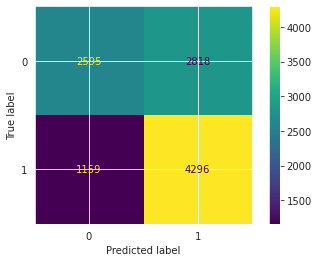

In [76]:
matrix = confusion_matrix(target_test, predicted)
ConfusionMatrixDisplay(confusion_matrix=matrix).plot();

              precision    recall  f1-score   support

           0       0.69      0.48      0.57      5413
           1       0.60      0.79      0.68      5455

    accuracy                           0.63     10868
   macro avg       0.65      0.63      0.62     10868
weighted avg       0.65      0.63      0.63     10868



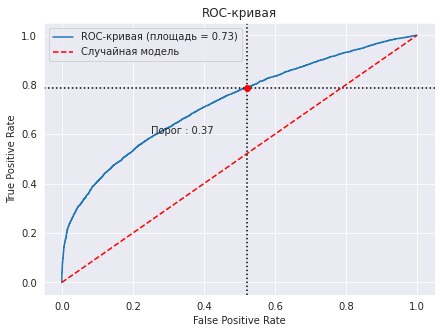

In [77]:
print(classification_report(target_test, predicted))
probs = clf.predict_proba(features_test)[:, 1]
roc_auc = roc_auc_score(target_test, probs)
plot_roc_curve(roc_auc, probs)

**Вывод**:  
- проведён подбор гиперпараметров для трёх моделей: случайного леса, логистической регрессии и градиентного бустинга;  
- на кросс-валидации лучший результат продемонстрировала модель градиентного бустинга, поэтому была выбрана для дальнейшего исследования;  
- при пороге классификации равным 0.37 удаётся обнаружить примерно 78% потенциальных виновников ДТП.

## Проведите анализ важности факторов ДТП

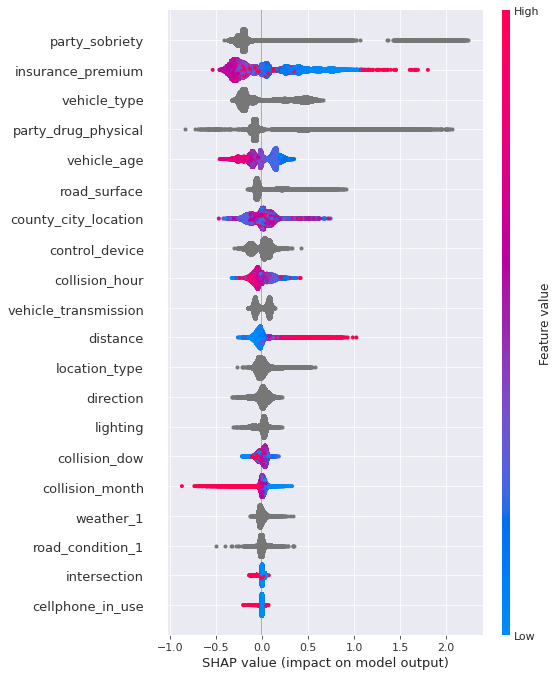

In [78]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(features_train.values)

shap.summary_plot(shap_values, features_train,
                  class_names=clf.classes_)

Взглянем подробнее на главные признаки, влияющие на предсказание модели.

### Трезвость участника

,had not been drinking,"had been drinking, under influence",impairment unknown,unknown,"had been drinking, not under influence","had been drinking, impairment unknown",not applicable
party_sobriety,47042,4301,1164,802,551,243,236


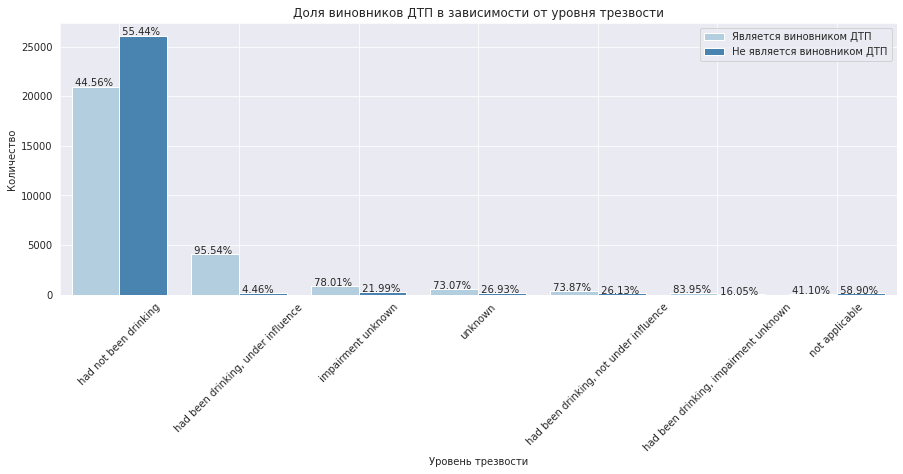

In [79]:
display(df['party_sobriety'].value_counts().to_frame().T)
get_barplot(df, 'party_sobriety', rot=45)

Тут без неожиданностей: участник ДТП, находящийся под влиянием алкоголя, в большинстве случаев оказывается виновником аварии.

### Тип кузова

,sedan,coupe
vehicle_type,36056,18283


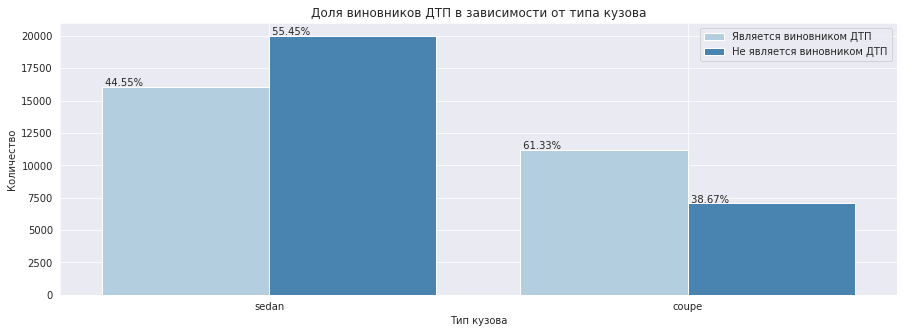

In [80]:
display(df['vehicle_type'].value_counts().to_frame().T)
get_barplot(df, 'vehicle_type')

Результаты также выглядят логично: водители, которые предпочитают купе, со значительно большей вероятностью становятся виновниками ДТП.

### Сумма страховки

,19,21,20,22,18,23,24,25,26,27,...,81,82,15,83,84,85,87,86,88,89
insurance_premium,2148,2115,2070,1914,1833,1738,1659,1556,1487,1365,...,108,105,82,81,71,60,52,51,45,25


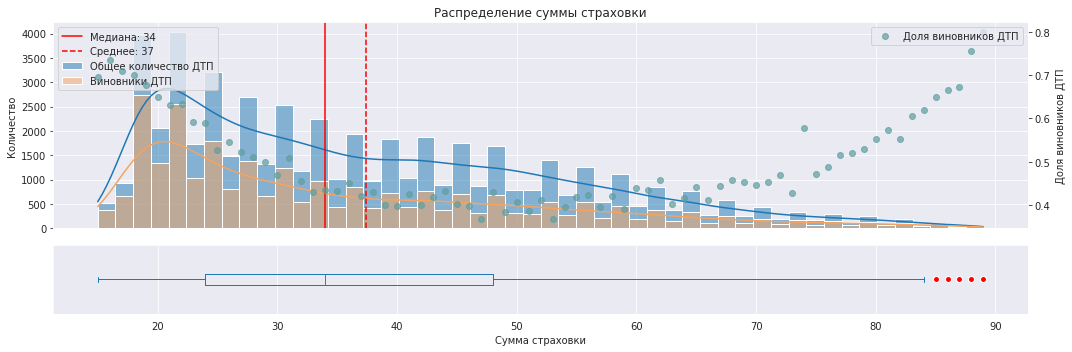

In [81]:
display(df['insurance_premium'].value_counts().to_frame().T)
get_histogram(df, 'insurance_premium', bins_num=50, plot_style='o')

Шансы оказаться виновником ДТП выше у клиентов с наиболее низкой и наиболее высокой стоимостью страховки.

## Выводы

**Краткое описание таблиц**  
• **collisions** — общая информация о ДТП   
Имеет уникальный `case_id`. Эта таблица описывает общую информацию о ДТП. Например, где оно произошло и когда.   
• **parties** — информация об участниках ДТП   
Имеет неуникальный `case_id`, который сопоставляется с соответствующим ДТП в таблице collisions. Каждая строка здесь описывает одну из сторон, участвующих в ДТП. Если столкнулись две машины, в этой таблице должно быть две строки с совпадением case_id. Если нужен уникальный идентификатор, это case_id and party_number.   
• **vehicles** — информация о пострадавших машинах  
Имеет неуникальные `case_id и неуникальные `party_number`, которые сопоставляются с таблицей collisions и таблицей parties. Если нужен уникальный идентификатор, это `case_id` and `party_number`.  


**Первичное исследование таблиц**:
- все загруженные таблицы имеют набор данных;  
- количество таблиц и типы данных соответствуют условию задачи;  
- таблица `case_ids` содержит данные только за 2021-й год.  

**Статистический анализ факторов ДТП**:   
- осень и весна – сезоны с наибольшим числом аварий, декабрь также находится в ледерах по количеству ДТП;  
- если автомобилю от трёх до восьми лет, то вероятность оказаться виновником ДТП снижается по мере увеличения возраста транспортного средства,  
от восьми лет – возрастает;  
- неблагоприятные погодные условия негативно влияют на вероятность стать виновником ДТП.    

**Предобработка данных**:  
- обработка пропусков:  
    - `direction`, `location_type`, `party_sobriety`, - заполнены значением `unknown`;  
    - `vehicle_transmission` - значением `auto`;  
    - `party_drug_physical` - заполнены значением `not applicable`;    
    - `cellphone_in_use` - заполнены значением `1`;    
    - `vehicle_age` - заполнены модой в зависимости от географического района, типа кузова и типа КПП;    
    - `insurance_premium` - заполнены модой в зависимости от географического района, типа кузова, типа КПП и возраста автомобиля;    
    - пропуски в остальных столбцах были удалены;    
- в переменных `distance`, ` vehicle_age ` и ` insurance_premium ` удалены выбросы и аномалии;  
- после предобработки сохранилось примерно 97% от изначального объема данных.  

**Создание модели для оценки водительского риска**:   
- подобраны гиперпараметры для моделей случайного леса, градиентного бустинга и логистической регрессии;  
- на кросс-валидации лучший результат продемонстрировал `CatBoostClassifier`;  
- исходя из поставленной задачи, было принято решение понизить порог классификации, для того чтобы увеличить охват потенциальных виновников ДТП;  
- значение метрик, полученные на тестовой выборке:  
    - `roc_auc` = 73;  
    - `f1` = 68;  
    - `precision` = 60;  
    - `recall` = 78.  
 
Для создания адекватной системы оценки риска при выдаче авто необходимы данные о случаях, которые не привели к ДТП. Также в полученных датасетах в большей степени содержится информация о транспортных средствах и обстоятельствах аварии и не достаёт информации о клиенте.